# Inicio del procesado de datos por parte del equipo dinamita >:D

In [ ]:
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


In [ ]:

# commands to install packages
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

# !pip install seaborn


In [ ]:

# !pip install -U seaborn


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
apartments = pd.read_csv('/content/drive/MyDrive/BEDU/apartments.csv')
apartments.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,2.500000e+09,13500000.0,320.0,4.0,5.0,2500000.0,3.0,...,1,1,1,1,False,USAQUEN,CIUDADELA REAL,Alcalá,2798.74,0
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,NaN,84.0,3.0,3.0,680000.0,1.0,...,0,0,1,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1135.12,0
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,1.980000e+09,9000000.0,248.0,3.0,3.0,2200000.0,3.0,...,1,0,1,1,False,USAQUEN,CERROS DE SANTA BARBARA,Calle 106,3138.91,0
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,NaN,77.2,3.0,2.0,367000.0,1.0,...,1,1,1,1,False,SUBA,CAMPOS DE SILENCIO,Cardio Infantil,936.00,0
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,NaN,213.0,3.0,4.0,994000.0,3.0,...,0,1,1,1,False,USAQUEN,GINEBRA,Prado Veraniego,2766.29,0


In [88]:
apartments_descriptions = apartments['descripcion']
apartments_descriptions.head()

0    vendo o arriendo ph duplex montearroyo, 320 mt...
1    oportunidad, bonito apartamento, recien refacc...
2    presentamos espectacular apartamento en uno de...
3    lindo apartamento, con 3 habitaciones 2 banos,...
4    vendo o arriendo iraka t 4 apto 201  213m mas ...
Name: descripcion, dtype: object

In [89]:
#  print all columns for apartments
columns = apartments.columns
print(columns)

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')


In [90]:
# dimensions
print(apartments.shape)

(63245, 38)


In [174]:
# Remove appartments with price = 0 or null, nan
apartments = apartments[apartments['precio_venta'] > 0]
apartments = apartments[apartments['precio_venta'].notnull()]
apartments = apartments[apartments['precio_venta'].notna()]

In [92]:
# Extract X and Y to predict price
# Columns
# Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
#        'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
#        'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
#        'latitud', 'descripcion', 'datetime', 'website', 'compañia',
#        'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
#        'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
#        'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
#        'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
#        'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
#        'is_cerca_estacion_tm'],
#       dtype='object')

# Removed antiguedad, 'jacuzzi', 'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado', 'is_cerca_estacion_tm'
X = apartments[['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', ]]
Y = apartments['precio_venta']
# Fill NaN with 0
X = X.fillna(0)



In [93]:
X.head()

,area,habitaciones,banos,parqueaderos,estrato
0,320.0,4.0,5.0,3.0,6.0
1,84.0,3.0,3.0,1.0,6.0
2,248.0,3.0,3.0,3.0,6.0
3,77.2,3.0,2.0,1.0,4.0
4,213.0,3.0,4.0,3.0,3.0


In [116]:

# Print nan values
print(Y.isnull().sum())


0


In [95]:
X.head()

,area,habitaciones,banos,parqueaderos,estrato
0,320.0,4.0,5.0,3.0,6.0
1,84.0,3.0,3.0,1.0,6.0
2,248.0,3.0,3.0,3.0,6.0
3,77.2,3.0,2.0,1.0,4.0
4,213.0,3.0,4.0,3.0,3.0


In [96]:
Y.head()

0    2.500000e+09
1    4.850000e+08
2    1.980000e+09
3    4.950000e+08
4    1.570000e+09
Name: precio_venta, dtype: float64

In [97]:
#  average Y
print(Y.mean())

1510209058.8843825


In [98]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [99]:
# remove X headers

In [100]:

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, Y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [101]:
Y.head()

0    2.500000e+09
1    4.850000e+08
2    1.980000e+09
3    4.950000e+08
4    1.570000e+09
Name: precio_venta, dtype: float64

In [102]:

# Print without scientific notation
np.set_printoptions(suppress=True)
print(int(reg.predict([[300, 2, 1, 1, 3]])))

-606061080


****

In [103]:
import seaborn as sns

In [199]:
apartments = apartments[apartments['area'] < 400]

In [104]:
def iqr_filter (df,serie_pandas, filtro_inferior, filtro_superior):
    iqr = serie_pandas.quantile(filtro_superior) - serie_pandas.quantile(filtro_inferior)
    bool_inferior = serie_pandas > serie_pandas.quantile(filtro_inferior) - (iqr * 1.5)
    bool_superior = serie_pandas < serie_pandas.quantile(filtro_superior) + (iqr * 1.5)
    df_filtro = df[bool_inferior & bool_superior]
    return df_filtro

In [200]:
apartments = iqr_filter(apartments,apartments['precio_venta'],.25,.75)

In [201]:
X = apartments['area']
y = apartments['precio_venta']

In [202]:
y

1        4.850000e+08
3        4.950000e+08
4        1.570000e+09
5        7.500000e+08
8        6.900000e+08
             ...     
62407    4.300000e+08
62408    3.050000e+08
62409    5.750000e+08
62417    2.600000e+08
62682    3.681500e+08
Name: precio_venta, Length: 38798, dtype: float64

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [193]:
y_train.head()

59014    2.600000e+08
21555    6.300000e+08
28927    1.800000e+09
27707    1.080000e+09
33046    6.500000e+08
Name: precio_venta, dtype: float64

In [181]:
X_train.head()

454      140.0
30558     75.0
31640    160.0
21134    181.0
29026    300.0
Name: area, dtype: float64

In [204]:
X_train.index[X_train.isnull()].tolist()

[]

In [205]:
X_train.corr(y_train)

0.850932865061026

In [130]:
import statsmodels.api as sm

In [213]:
print(X_train.isnull().sum())

0


In [146]:
X_train = X_train.dropna()

In [207]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [208]:
lr.params

const    5.284006e+06
area     6.106203e+06
dtype: float64

In [209]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           precio_venta   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 7.127e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:24:10   Log-Likelihood:            -5.5950e+05
No. Observations:               27158   AIC:                         1.119e+06
Df Residuals:                   27156   BIC:                         1.119e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.284e+06   2.76e+06      1.916      0.0

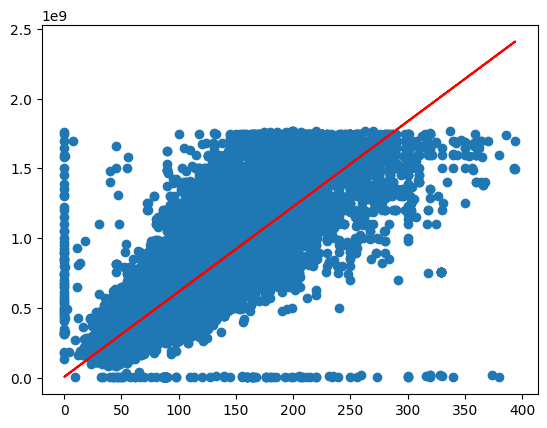

In [210]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 5.284e+06 + 6.106e+06*X_train, 'r')
plt.show()

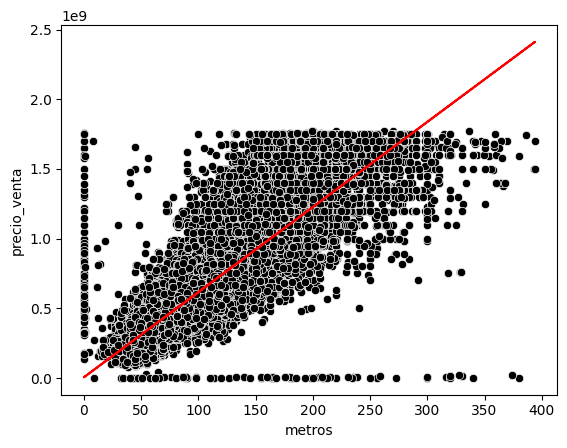

In [214]:
sns.scatterplot(x = X_train,y = y_train,  color='black')
plt.xlabel('metros')
plt.plot(X_train, 5.284e+06 + 6.106e+06*X_train, 'r')

<Axes: >

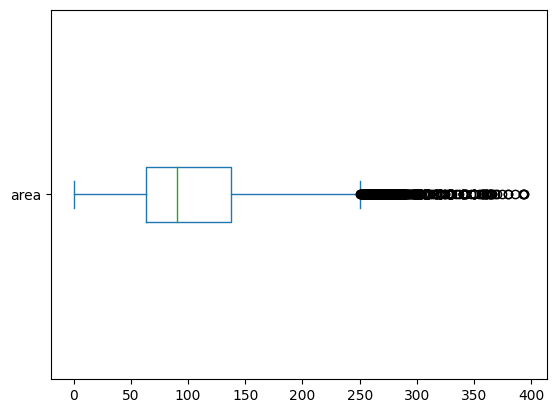

In [218]:
X_train.plot(kind='box', vert=False)

<Axes: >

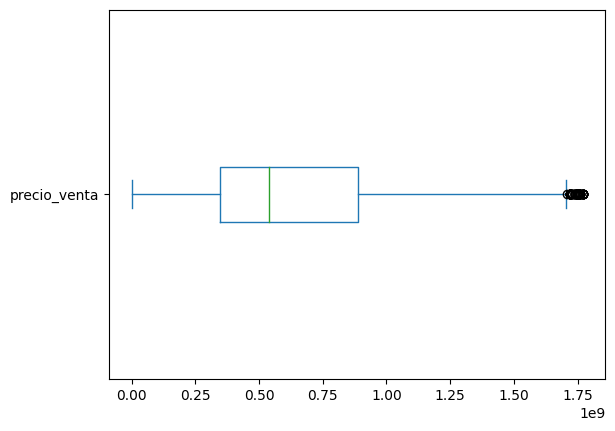

In [219]:
y_train.plot(kind='box', vert=False)

****

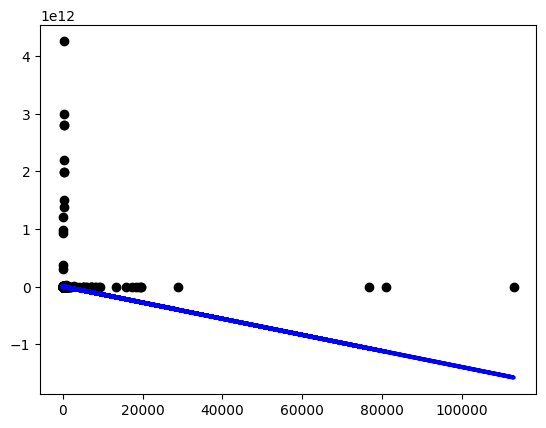

In [ ]:
# X['area] values with matplotlib
plt.scatter(X['area'], Y,  color='black')
plt.plot(X['area'], reg.predict(X), color='blue', linewidth=3)




In [ ]:
Y = Y.astype(float)

In [ ]:
Y[0] + Y[1]

2985000000.0

In [ ]:
y_menor = Y[Y<0]

In [ ]:
y_menor

Series([], Name: precio_venta, dtype: float64)

In [ ]:
data = {'precio_venta': ['2.500000e+09', '1.234567e+08', '9.876543e+07']}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)

# Convertir la columna 'precio_venta' a números flotantes
df['precio_venta'] = df['precio_venta'].astype(float)

# Mostrar el DataFrame con números normales en la columna 'precio_venta'
print("\nDataFrame con números normales:")
print(df)

DataFrame original:
   precio_venta
0  2.500000e+09
1  1.234567e+08
2  9.876543e+07

DataFrame con números normales:
   precio_venta
0  2.500000e+09
1  1.234567e+08
2  9.876543e+07
